 ## importing the dependencies

In [77]:
#importing all modules and libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [78]:
# loading the dataset to a pandas DataFRame
credit_card_data = pd.read_csv("creditcard.csv")
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Train-Test Split
I will use 50-50 train-test split. Surprised? Let me explain why.

Since the dataset contains only 492 (0.172%) fraudulent transactions, if I use the conventional 80-20 (or 70-30) train-test split, it will result in very less positive cases (fraudulent transactions) in the test set for testing

In [79]:
#first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [80]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [81]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

we dont have any missing values so no need to go through the imputation process

In [82]:
# distribution of legit transaction and fraudulentt transactions
credit_card_data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

here 0 represents normal transaction and 1 represents fraud ransactions
this dataset is highly unbalanced because here we have 2 target variables: 0,1

### we have 2 labels
   **normal transaction --> 0**/
   **fraudlent transaction --> 1**

In [83]:
#seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]


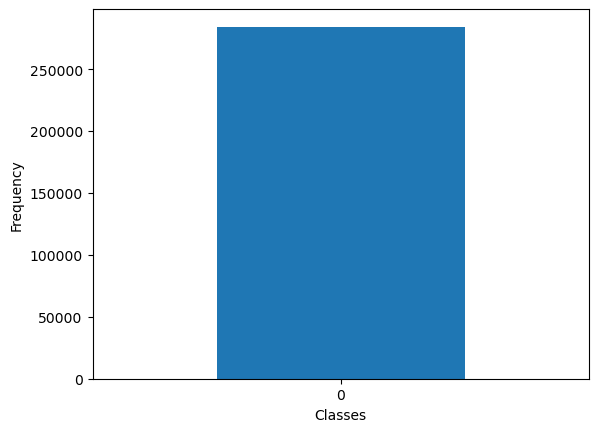

In [84]:
pd.value_counts(legit['Class'], sort= True).plot(kind= 'bar', rot= 0)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()
##Fraudulent cases are very low

In [85]:
legit.shape,fraud.shape

((284315, 31), (492, 31))

In [86]:
#statistical measures of the data 
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [87]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [88]:
#compare the values for both transactions
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# under sampling
**build a sample dataset containing similar distribution of normal transactions and fraudlent transactions**


number of fradulent transactions --> 492

In [89]:
legit_sample = legit.sample(n= 492)
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
206705,136328.0,2.110501,-0.493482,-0.788506,-0.493916,-0.276638,-0.079000,-0.685313,-0.017423,1.126250,...,0.103244,0.438635,0.170494,0.183835,-0.354829,1.277576,-0.084381,-0.058069,1.00,0
69461,53439.0,1.330123,-1.009781,0.924822,-1.092421,-1.362725,0.374860,-1.407920,0.234008,-0.047982,...,-0.200443,-0.084138,0.009723,-0.716494,-0.104149,1.576448,-0.021209,0.011686,25.56,0
84694,60423.0,1.265303,-0.108345,0.478389,-0.252708,-0.605503,-0.521450,-0.346062,0.025155,0.217445,...,-0.109021,-0.352554,0.049920,0.055119,0.118432,0.908685,-0.077346,-0.005077,1.12,0
272745,165247.0,1.793349,-0.767807,-0.228463,0.465812,-0.944393,-0.235371,-0.711553,0.119788,1.074009,...,0.260915,0.761644,0.114139,0.064890,-0.382508,0.543243,-0.036485,-0.045482,79.99,0
251465,155354.0,2.072576,-0.050556,-1.615232,0.480389,0.113722,-1.419292,0.490777,-0.444312,0.447735,...,-0.034991,0.076227,0.076884,0.095949,0.159267,0.558837,-0.101156,-0.076248,12.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218999,141553.0,-1.058695,1.779812,-1.257872,-0.604522,0.306237,-0.932145,0.443339,0.511158,0.239273,...,-0.358891,-0.898646,0.171287,0.548132,-0.314082,0.086141,-0.107532,-0.156487,11.99,0
143055,85095.0,-1.405553,1.882678,0.071833,-0.730128,0.741038,0.235623,0.523158,0.225955,0.384852,...,-0.474424,-0.987181,-0.183575,-1.464182,0.308232,0.183303,0.751904,0.412184,2.68,0
50790,44653.0,-0.394900,0.078327,1.314828,-1.673320,0.088490,-0.636487,0.284171,-0.091849,-1.073356,...,-0.013111,-0.039242,-0.229804,-0.106170,-0.058675,-0.496725,-0.076018,-0.101115,9.00,0
209420,137550.0,-9.605286,-8.919475,-1.669717,0.059127,3.078361,-0.652070,-2.685818,0.544378,-0.050722,...,-1.242155,-1.317159,-5.311390,-0.375854,-0.764298,-0.498941,1.500191,-1.786864,399.55,0


Concatenating two dataframes

In [90]:
new_dataset = pd.concat([legit_sample,fraud],axis= 0) #values to be added row wise

In [91]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [92]:
new_dataset["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [93]:
new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97831.701220,0.067095,0.051339,-0.022337,-0.145952,0.025408,-0.043857,0.001988,0.052909,-0.048004,...,-0.049998,-0.030649,0.012983,0.000291,-0.015453,-0.027742,0.007887,-0.011121,-0.011539,69.457541
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


splitting the data into features and targets

In [94]:
x= new_dataset.drop(columns="Class",axis =1)
y= new_dataset["Class"]

In [95]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
206705,136328.0,2.110501,-0.493482,-0.788506,-0.493916,-0.276638,-0.079000,-0.685313,-0.017423,1.126250,...,-0.080744,0.103244,0.438635,0.170494,0.183835,-0.354829,1.277576,-0.084381,-0.058069,1.00
69461,53439.0,1.330123,-1.009781,0.924822,-1.092421,-1.362725,0.374860,-1.407920,0.234008,-0.047982,...,-0.420269,-0.200443,-0.084138,0.009723,-0.716494,-0.104149,1.576448,-0.021209,0.011686,25.56
84694,60423.0,1.265303,-0.108345,0.478389,-0.252708,-0.605503,-0.521450,-0.346062,0.025155,0.217445,...,-0.070876,-0.109021,-0.352554,0.049920,0.055119,0.118432,0.908685,-0.077346,-0.005077,1.12
272745,165247.0,1.793349,-0.767807,-0.228463,0.465812,-0.944393,-0.235371,-0.711553,0.119788,1.074009,...,-0.082860,0.260915,0.761644,0.114139,0.064890,-0.382508,0.543243,-0.036485,-0.045482,79.99
251465,155354.0,2.072576,-0.050556,-1.615232,0.480389,0.113722,-1.419292,0.490777,-0.444312,0.447735,...,-0.251961,-0.034991,0.076227,0.076884,0.095949,0.159267,0.558837,-0.101156,-0.076248,12.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [96]:
y

206705    0
69461     0
84694     0
272745    0
251465    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

split the data into training and testing data

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, stratify=y,random_state = 2)

In [98]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((787, 30), (197, 30), (787,), (197,))

## model training
logistic regression model

In [99]:
model = LogisticRegression()

#training the logistic regression model with training data
model.fit(x_train,y_train)

#model evaluation(accuracy score)
y_preds=model.predict(x_train)

training_data_accuracy = accuracy_score(y_preds,y_train)
print("Accuracy on training data:",training_data_accuracy)

Accuracy on training data: 0.9491740787801779


In [100]:
#accuracy on test data
y_preds1=model.predict(x_test)
test_accuracy=accuracy_score(y_preds1,y_test)
test_accuracy

0.8984771573604061

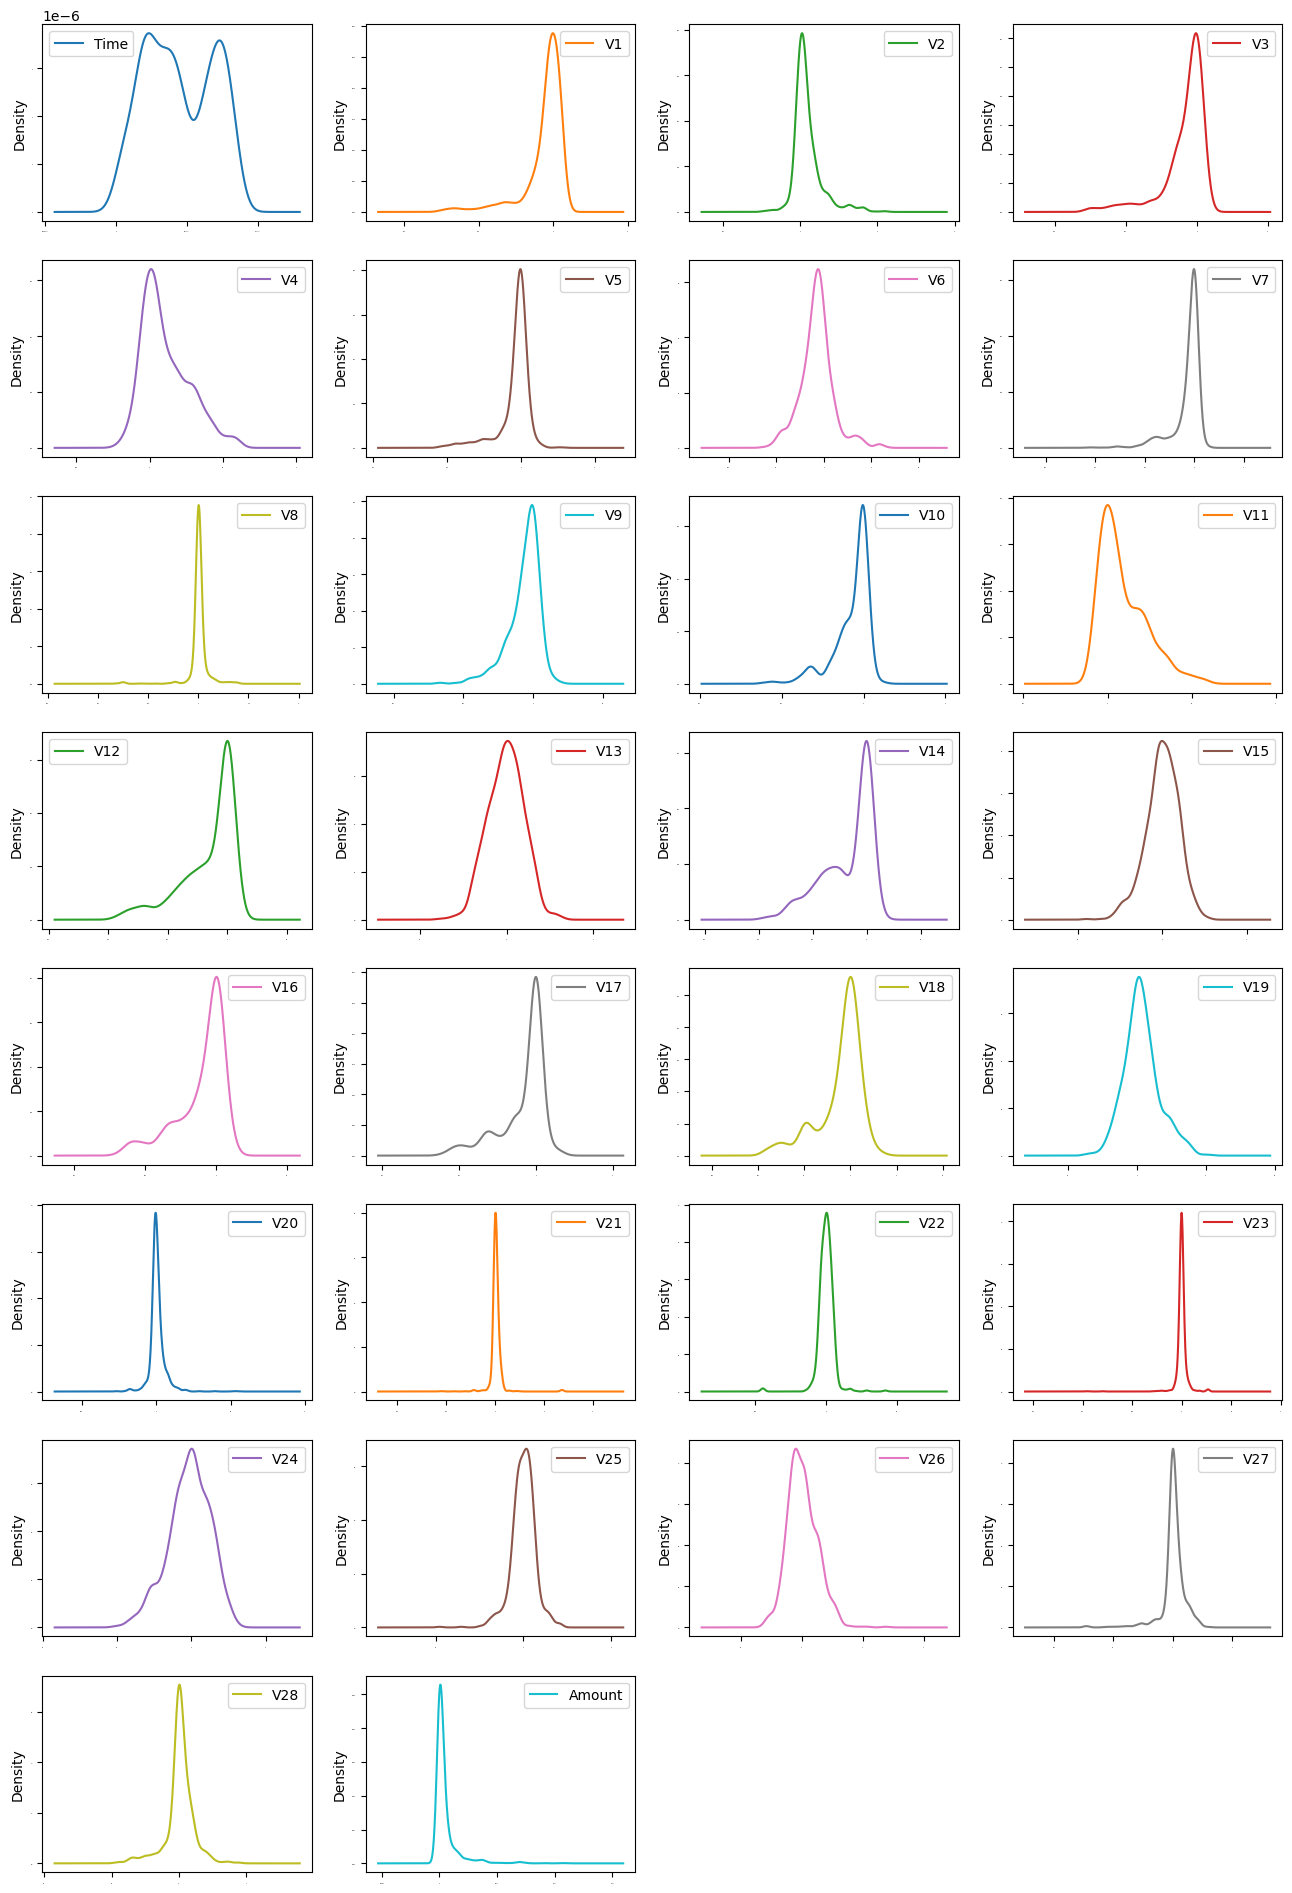

In [101]:
# Check the distribution of the numerical features
x.plot(kind='density', subplots=True, layout=(8,4), sharex=False, legend=True, 
                                            fontsize=1, figsize=(16,24))
plt.show()